# Taxi Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings('ignore')

# Data Visualisation

In [2]:
df=pd.read_csv("TaxiFare.csv")

In [3]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
df.head(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,50:45.0,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,35:00.0,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,22:00.0,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,10:00.0,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,11:00.0,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [5]:
df.tail()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2
49999,13:14.0,10.9,2010-01-13 08:13:14 UTC,-73.932603,40.763805,-73.932603,40.763805,1


In [6]:
df.tail(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
49990,16:00.0,4.5,2013-07-18 00:16:00 UTC,-74.002857,40.734137,-74.001610,40.739282,1
49991,56:19.0,10.5,2013-10-17 19:56:19 UTC,-73.991685,40.739494,-73.985357,40.731971,1
49992,41:47.0,6.1,2009-06-06 10:41:47 UTC,-73.984673,40.768434,-73.988215,40.760082,1
49993,27:00.0,7.3,2011-04-07 14:27:00 UTC,-73.982363,40.765060,-73.969167,40.761268,1
49994,57:00.0,8.5,2012-10-13 19:57:00 UTC,-73.976212,40.744832,-73.981567,40.724635,1
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2
49999,13:14.0,10.9,2010-01-13 08:13:14 UTC,-73.932603,40.763805,-73.932603,40.763805,1


In [7]:
df.sample()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
42132,05:23.0,4.5,2009-05-14 02:05:23 UTC,-73.9913,40.719539,-73.990065,40.729279,1


In [8]:
df.sample(20)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
35838,22:12.0,15.00,2014-05-05 21:22:12 UTC,-74.007500,40.726916,-73.964449,40.717236,1
18753,18:00.0,20.50,2014-02-13 00:18:00 UTC,-73.921470,40.766790,-73.951200,40.711170,1
17576,42:09.0,23.70,2010-10-24 19:42:09 UTC,-73.870374,40.773703,-73.978702,40.761821,1
2647,26:15.0,3.50,2014-03-13 19:26:15 UTC,-73.963547,40.771194,-73.963431,40.775176,1
27211,20:00.0,4.90,2011-03-05 09:20:00 UTC,-73.975127,40.745797,-73.975127,40.745797,2
45356,24:00.0,19.00,2013-01-13 19:24:00 UTC,-73.981063,40.741627,-74.008322,40.704605,1
47336,46:18.0,4.50,2010-12-21 10:46:18 UTC,-73.985813,40.780565,-73.983733,40.773623,1
2910,23:12.0,7.00,2013-03-25 19:23:12 UTC,-73.982378,40.768638,-73.994505,40.755911,1
32099,12:00.0,7.30,2009-09-09 07:12:00 UTC,-73.968993,40.791112,-73.968502,40.788223,1
49967,31:34.0,20.50,2014-06-09 21:31:34 UTC,0.000000,0.000000,0.000000,0.000000,1


In [9]:
df.shape

(50000, 8)

In [10]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [12]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [13]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [14]:
df.describe(include="all")

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-09-03 01:30:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,NaN,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,NaN,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,NaN,8.500000,NaN,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,NaN,12.500000,NaN,-73.967148,40.767360,-73.963584,40.768167,2.000000


# Univariate

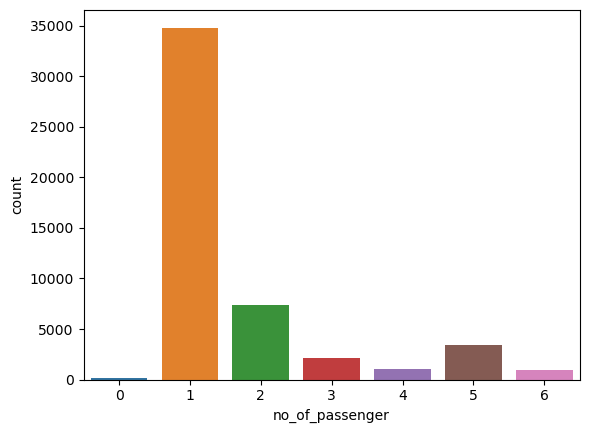

In [15]:
sns.countplot(x="no_of_passenger",data=df)
plt.show()

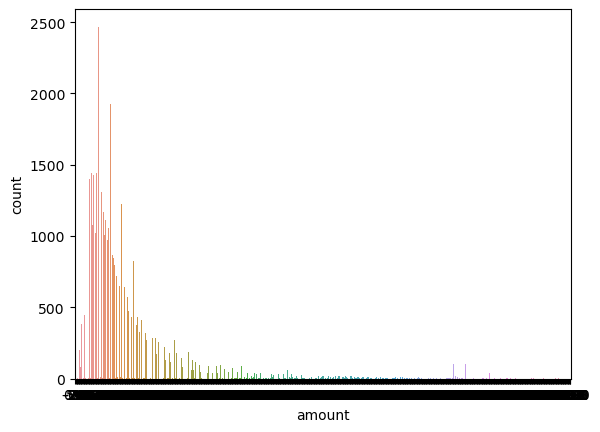

In [16]:
sns.countplot(x="amount",data=df)
plt.show()

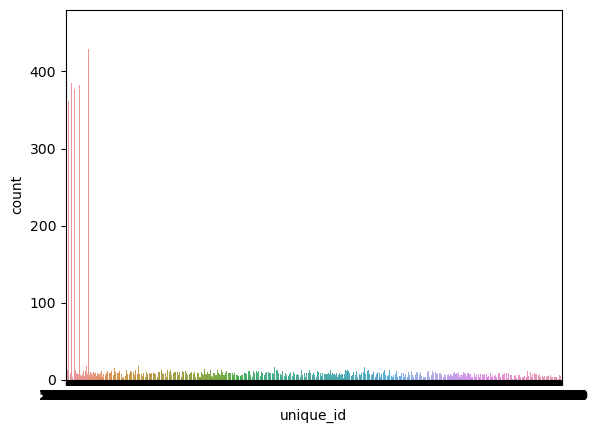

In [17]:
sns.countplot(x="unique_id",data=df)
plt.show()

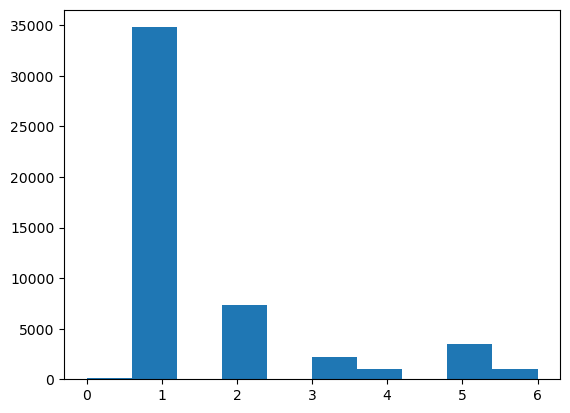

In [18]:
plt.hist("no_of_passenger",data=df)
plt.show()

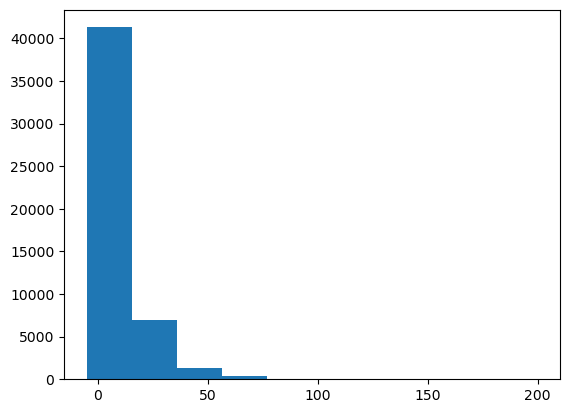

In [19]:
plt.hist("amount",data=df)
plt.show()

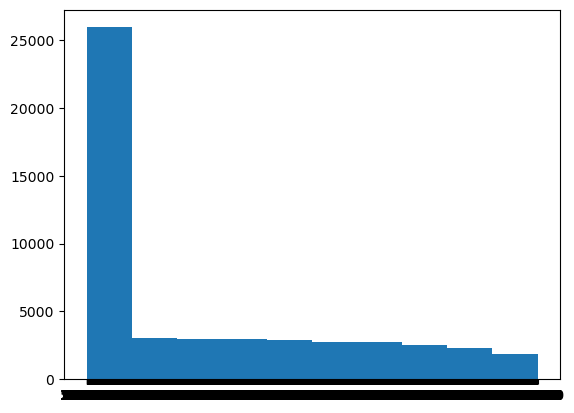

In [20]:
plt.hist("unique_id",data=df)
plt.show()

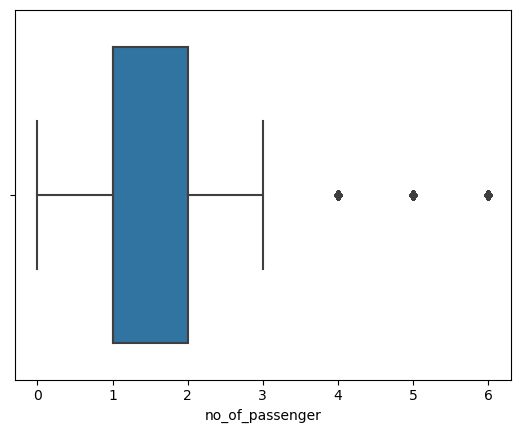

In [21]:
sns.boxplot(x="no_of_passenger",data=df)
plt.show()

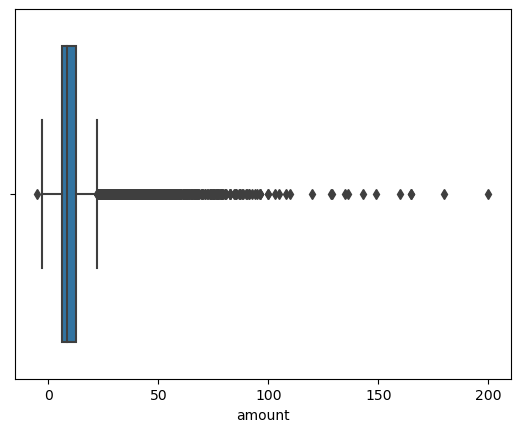

In [22]:
sns.boxplot(x="amount",data=df)
plt.show()

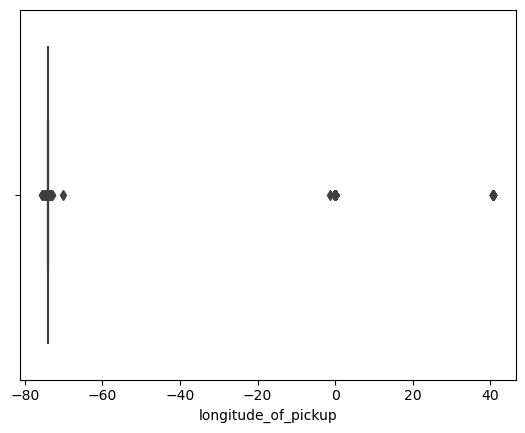

In [23]:
sns.boxplot(x="longitude_of_pickup",data=df)
plt.show()

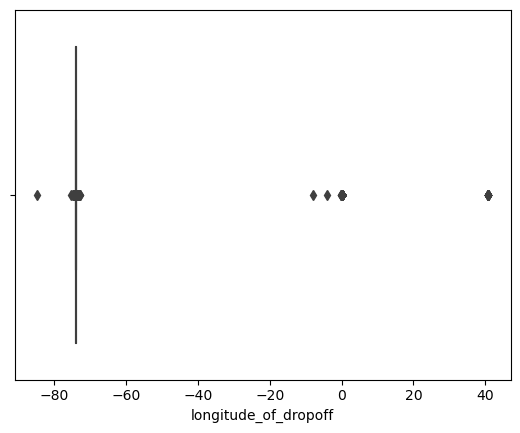

In [24]:
sns.boxplot(x="longitude_of_dropoff",data=df)
plt.show()

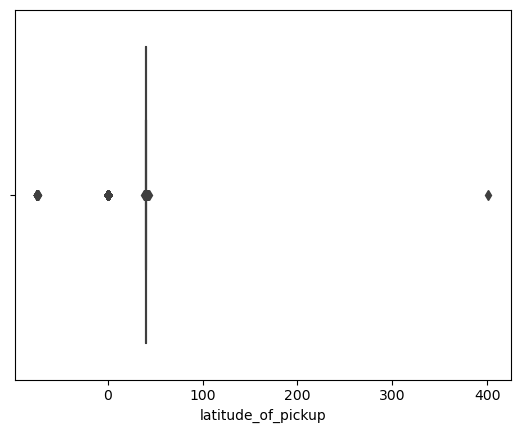

In [25]:
sns.boxplot(x="latitude_of_pickup",data=df)
plt.show()

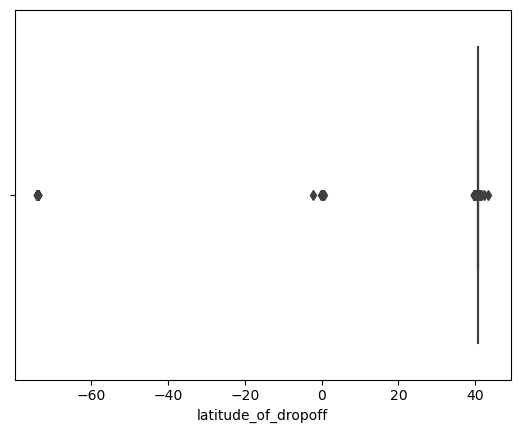

In [26]:
sns.boxplot(x="latitude_of_dropoff",data=df)
plt.show()

# Removing Outliers

In [27]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range
lowno_of_passenger,uppno_of_passenger=remove_outlier(df['no_of_passenger'])
df['no_of_passenger']=np.where(df['no_of_passenger']>uppno_of_passenger,uppno_of_passenger,df['no_of_passenger'])
df['no_of_passenger']=np.where(df['no_of_passenger']<lowno_of_passenger,lowno_of_passenger,df['no_of_passenger'])

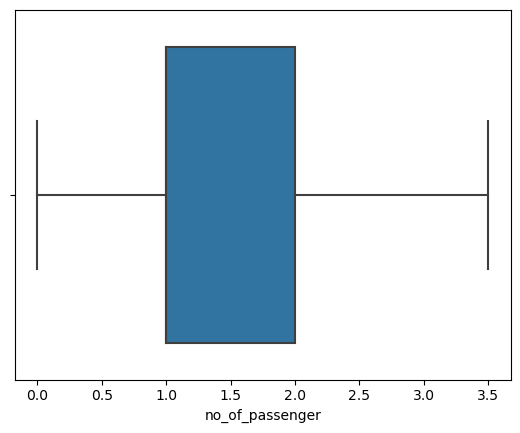

In [28]:
sns.boxplot(x="no_of_passenger",data=df)
plt.show()

In [29]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range
lowamount,uppamount=remove_outlier(df['amount'])
df['amount']=np.where(df['amount']>uppamount,uppamount,df['amount'])
df['amount']=np.where(df['amount']<lowamount,lowamount,df['amount'])

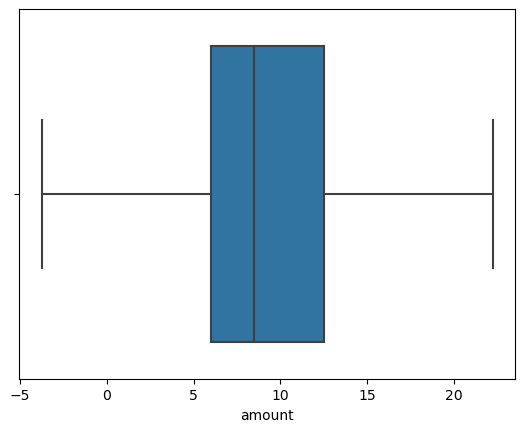

In [30]:
sns.boxplot(x="amount",data=df)
plt.show()

In [31]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range
lowlongitude_of_pickup,upplongitude_of_pickup=remove_outlier(df['longitude_of_pickup'])
df['longitude_of_pickup']=np.where(df['longitude_of_pickup']>upplongitude_of_pickup,upplongitude_of_pickup,df['longitude_of_pickup'])
df['longitude_of_pickup']=np.where(df['longitude_of_pickup']<lowlongitude_of_pickup,lowlongitude_of_pickup,df['longitude_of_pickup'])

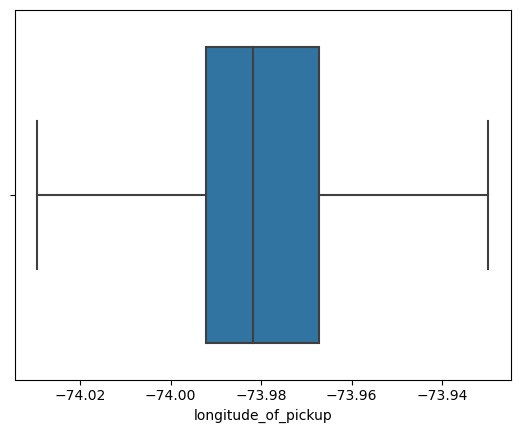

In [32]:
sns.boxplot(x="longitude_of_pickup",data=df)
plt.show()

In [33]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range
lowlongitude_of_dropoff,upplongitude_of_dropoff=remove_outlier(df['longitude_of_dropoff'])
df['longitude_of_dropoff']=np.where(df['longitude_of_dropoff']>upplongitude_of_dropoff,upplongitude_of_dropoff,df['longitude_of_dropoff'])
df['longitude_of_dropoff']=np.where(df['longitude_of_dropoff']<lowlongitude_of_dropoff,lowlongitude_of_dropoff,df['longitude_of_dropoff'])

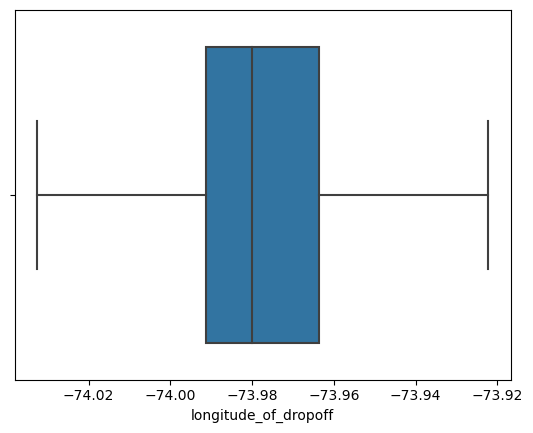

In [34]:
sns.boxplot(x="longitude_of_dropoff",data=df)
plt.show()

In [35]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range
lowno_of_passenger,uppno_of_passenger=remove_outlier(df['no_of_passenger'])
df['no_of_passenger']=np.where(df['no_of_passenger']>uppno_of_passenger,uppno_of_passenger,df['no_of_passenger'])
df['no_of_passenger']=np.where(df['no_of_passenger']<lowno_of_passenger,lowno_of_passenger,df['no_of_passenger'])

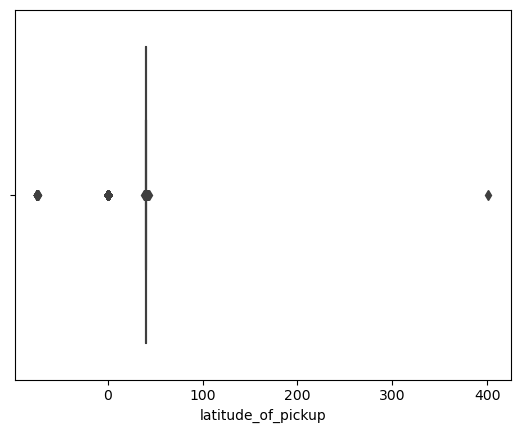

In [36]:
sns.boxplot(x="latitude_of_pickup",data=df)
plt.show()

In [37]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range
lowlatitude_of_pickup,upplatitude_of_pickup=remove_outlier(df['latitude_of_pickup'])
df['latitude_of_pickup']=np.where(df['latitude_of_pickup']>upplatitude_of_pickup,upplatitude_of_pickup,df['latitude_of_pickup'])
df['latitude_of_pickup']=np.where(df['latitude_of_pickup']<lowlatitude_of_pickup,lowlatitude_of_pickup,df['latitude_of_pickup'])

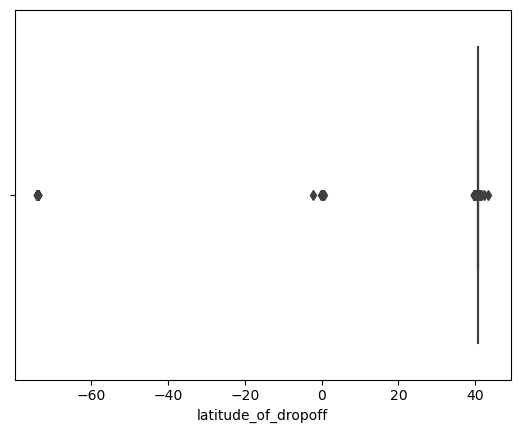

In [38]:
sns.boxplot(x="latitude_of_dropoff",data=df)
plt.show()

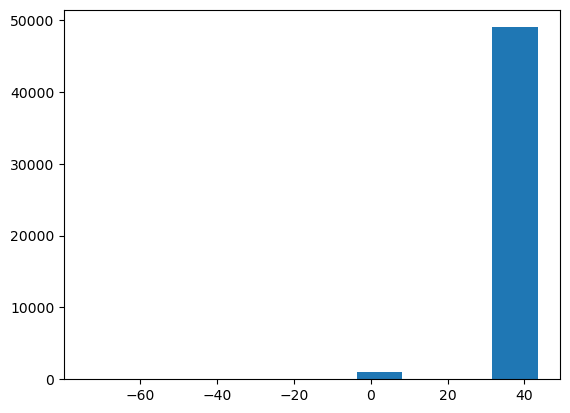

In [39]:
plt.hist("latitude_of_dropoff",data=df)
plt.show()

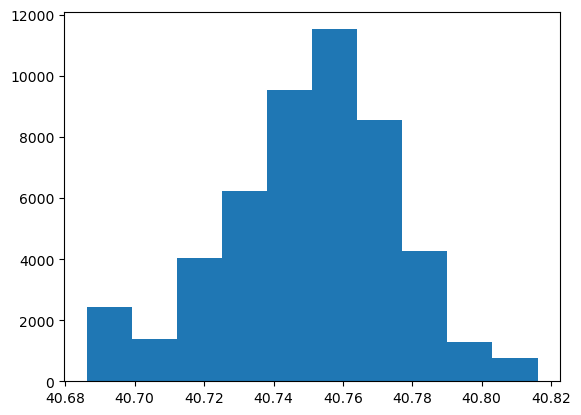

In [40]:
plt.hist("latitude_of_pickup",data=df)
plt.show()

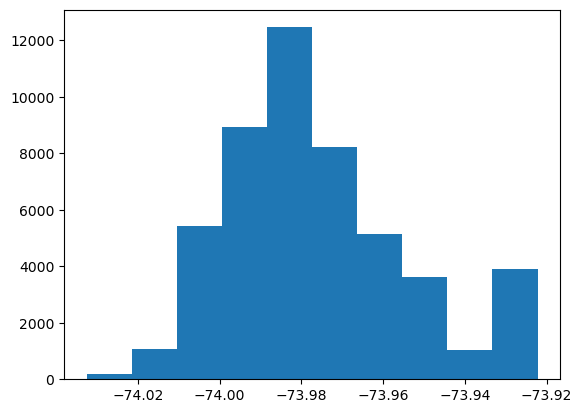

In [41]:
plt.hist("longitude_of_dropoff",data=df)
plt.show()

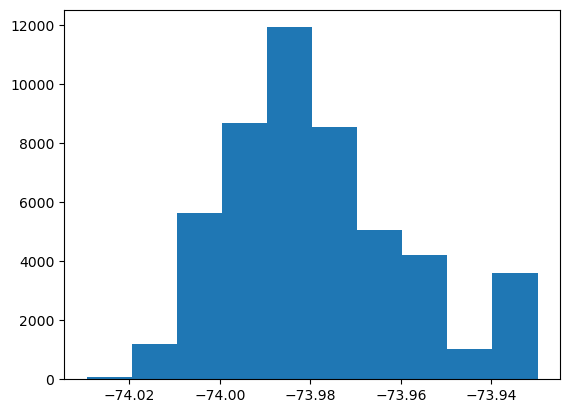

In [42]:
plt.hist("longitude_of_pickup",data=df)
plt.show()

# Bivariate

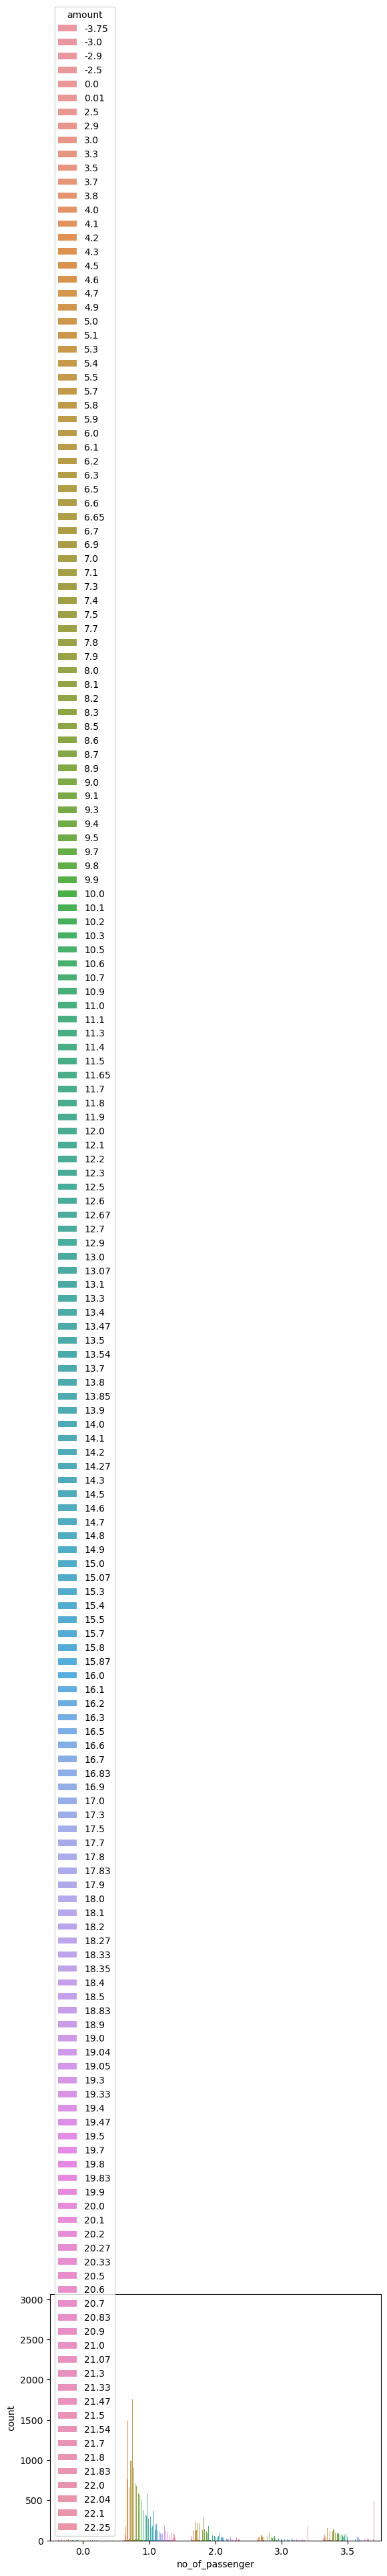

In [43]:
sns.countplot(x="no_of_passenger",hue="amount",data=df)
plt.show()

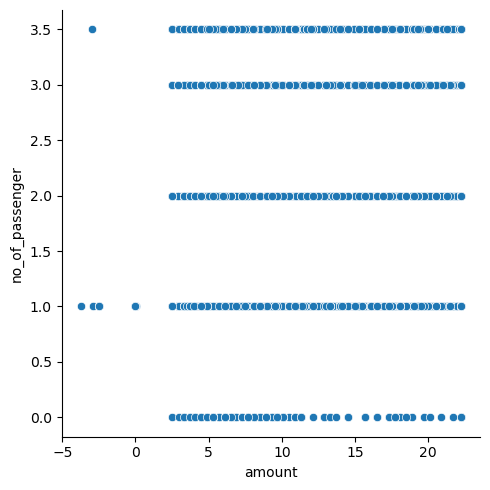

In [44]:
sns.relplot(x="amount",y="no_of_passenger",data=df)

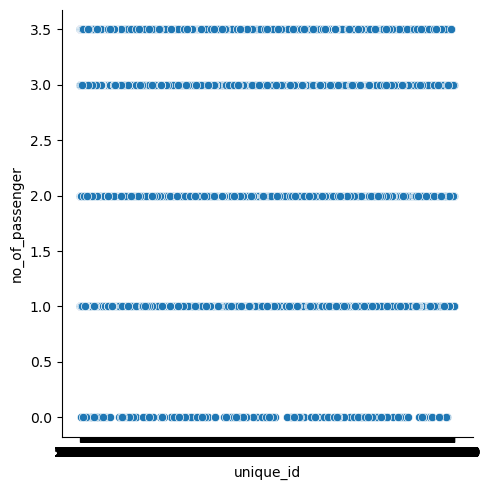

In [45]:
sns.relplot(x="unique_id",y="no_of_passenger",data=df)

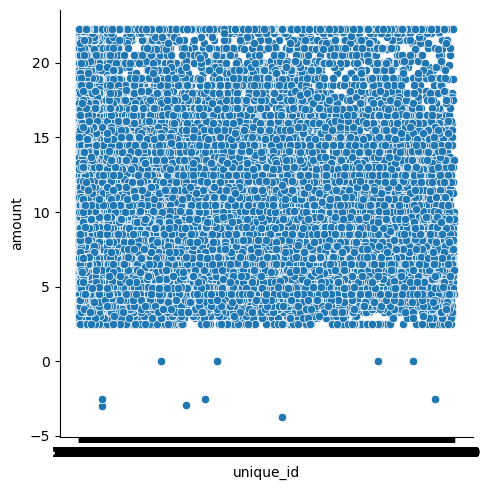

In [46]:
sns.relplot(x="unique_id",y="amount",data=df)

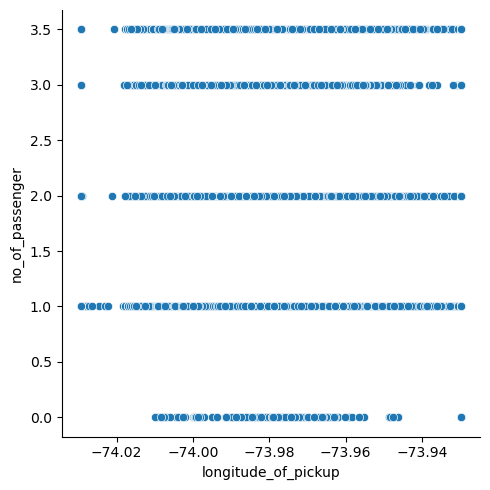

In [47]:
sns.relplot(x="longitude_of_pickup",y="no_of_passenger",data=df)

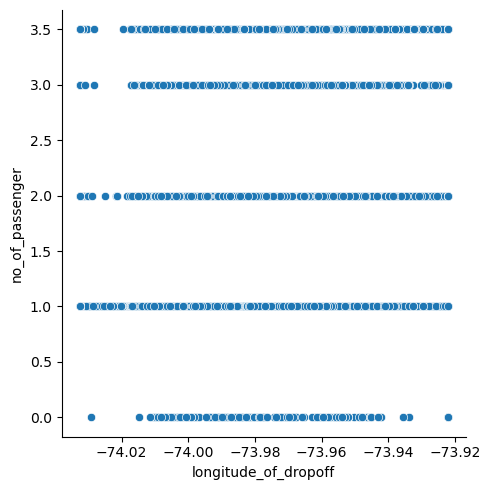

In [48]:
sns.relplot(x="longitude_of_dropoff",y="no_of_passenger",data=df)

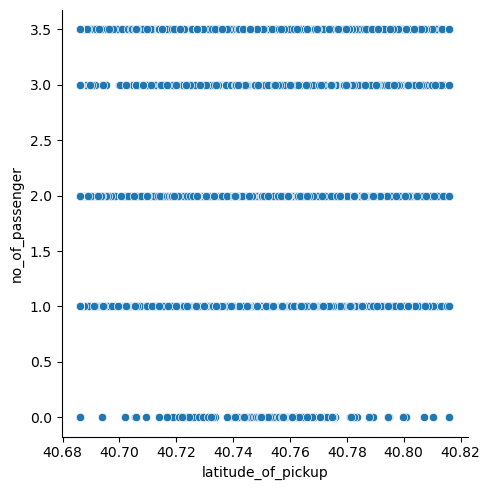

In [49]:
sns.relplot(x="latitude_of_pickup",y="no_of_passenger",data=df)

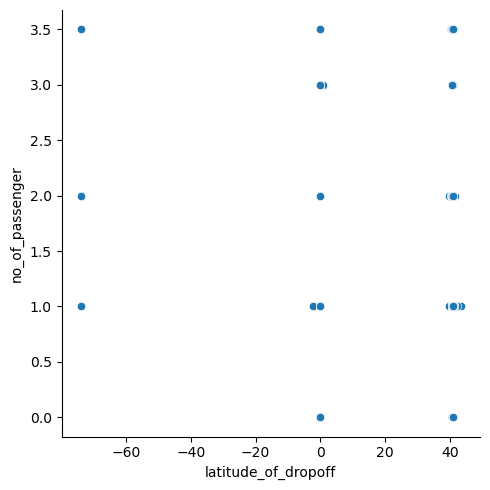

In [50]:
sns.relplot(x="latitude_of_dropoff",y="no_of_passenger",data=df)

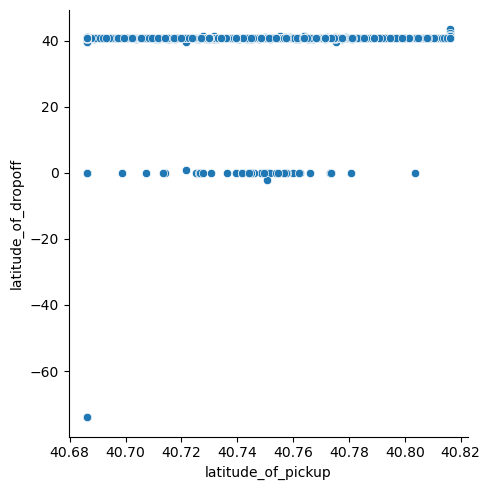

In [51]:
sns.relplot(x="latitude_of_pickup",y="latitude_of_dropoff",data=df)

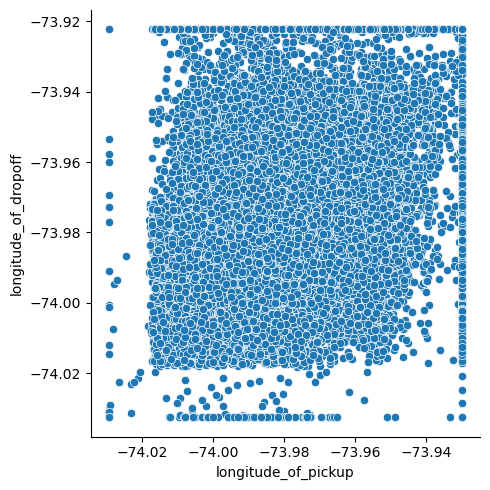

In [52]:
sns.relplot(x="longitude_of_pickup",y="longitude_of_dropoff",data=df)

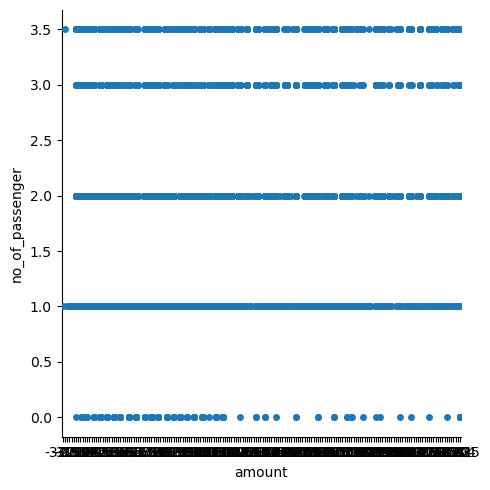

In [53]:
sns.catplot(x="amount",y="no_of_passenger",data=df)

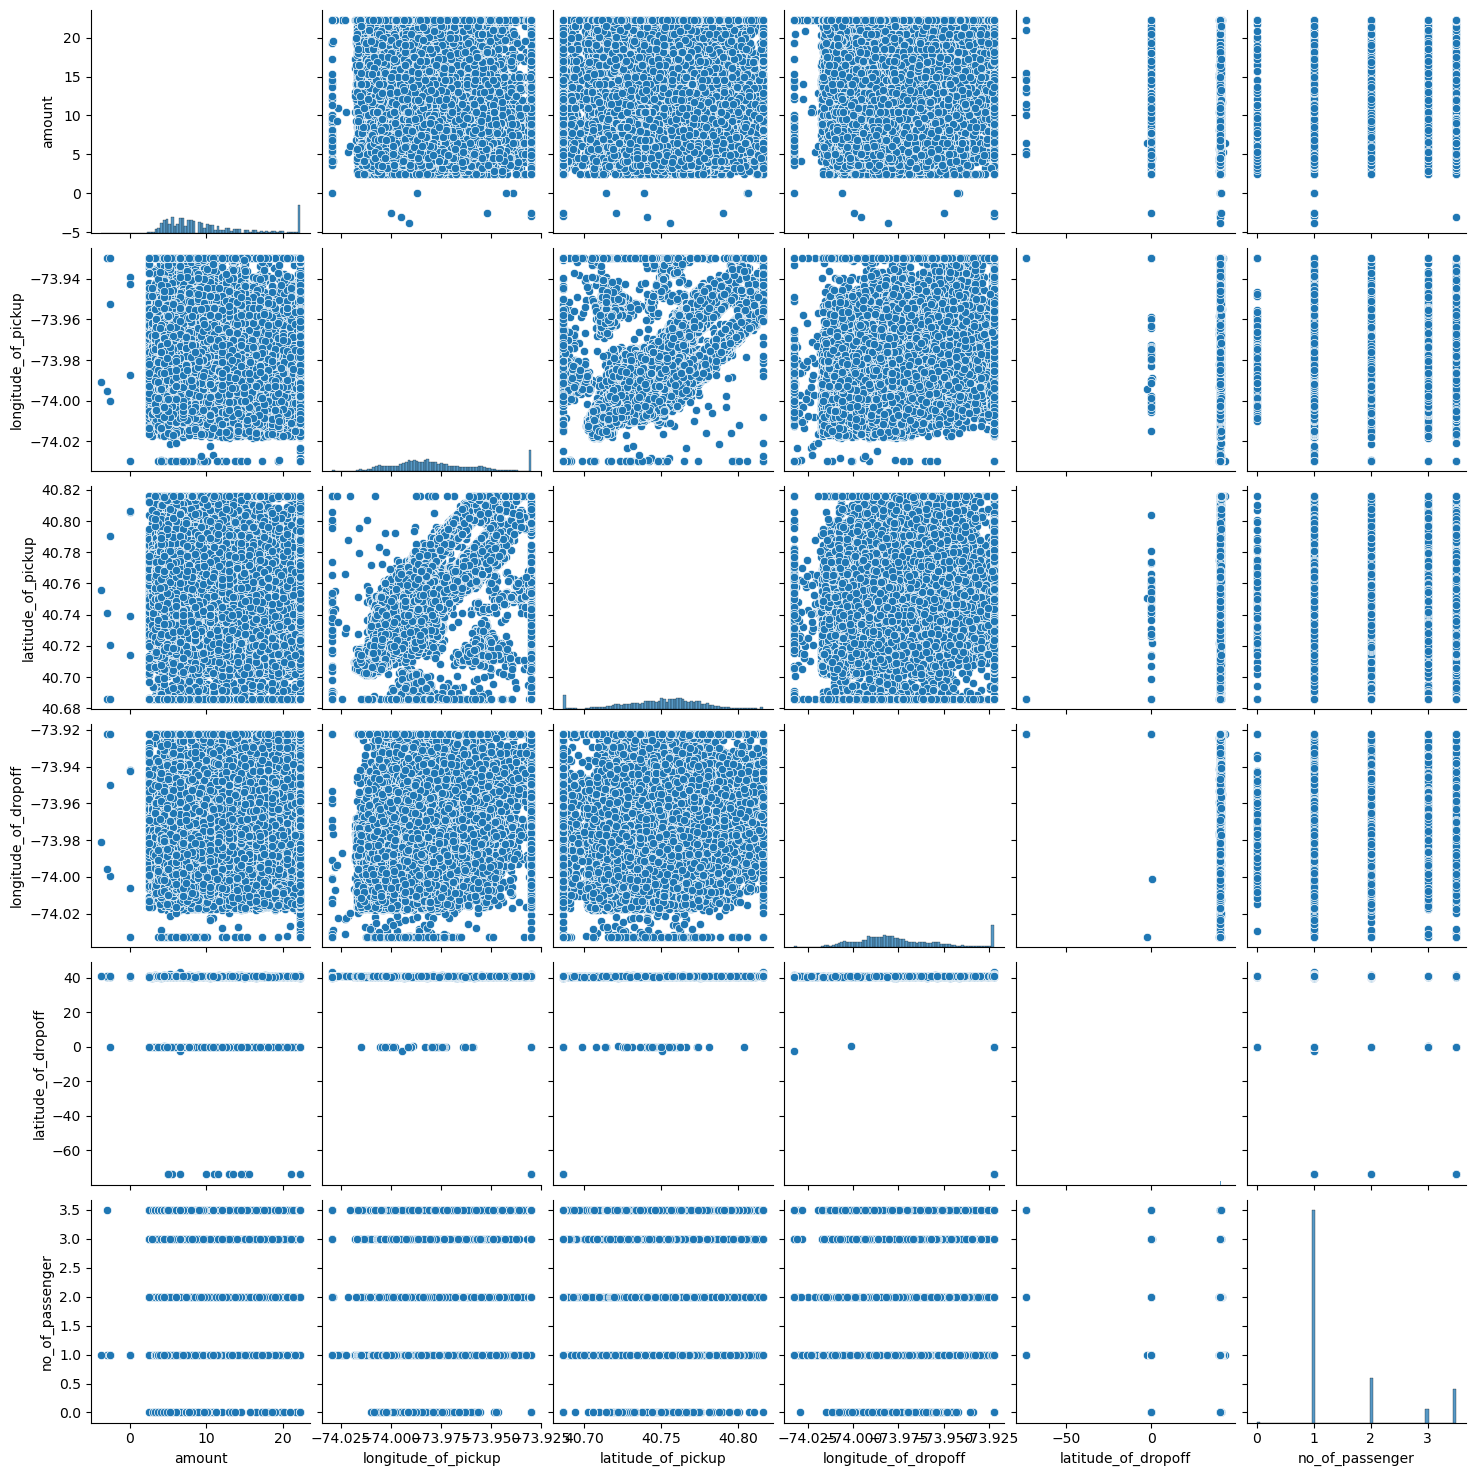

In [54]:
sns.pairplot(df)

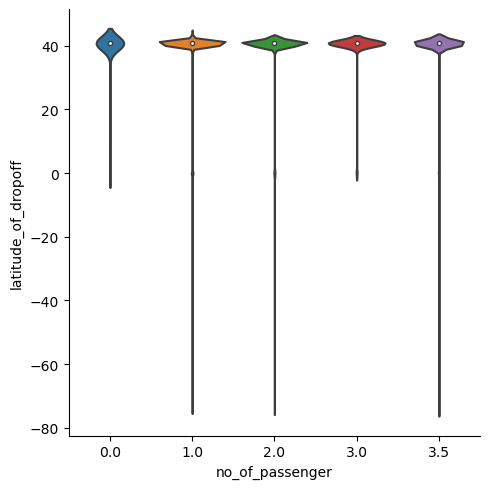

In [55]:
sns.catplot(x="no_of_passenger",y="latitude_of_dropoff",data=df,kind="violin")

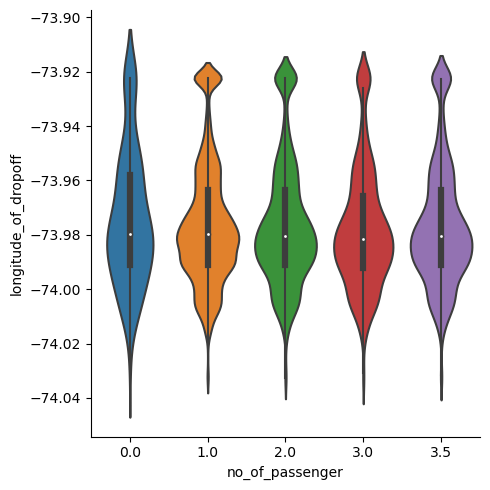

In [56]:
sns.catplot(x="no_of_passenger",y="longitude_of_dropoff",data=df,kind="violin")

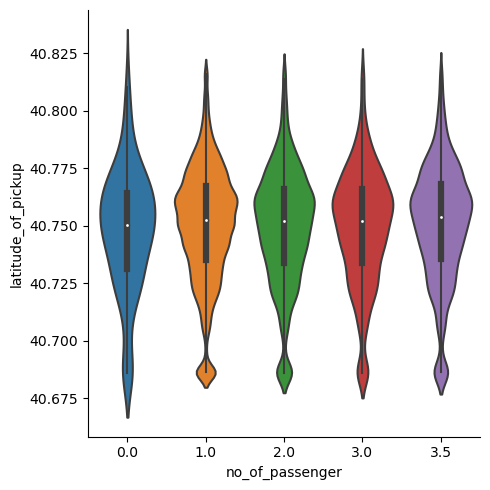

In [57]:
sns.catplot(x="no_of_passenger",y="latitude_of_pickup",data=df,kind="violin")

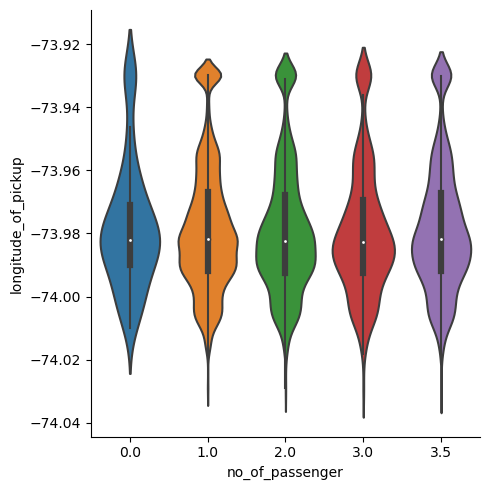

In [58]:
sns.catplot(x="no_of_passenger",y="longitude_of_pickup",data=df,kind="violin")

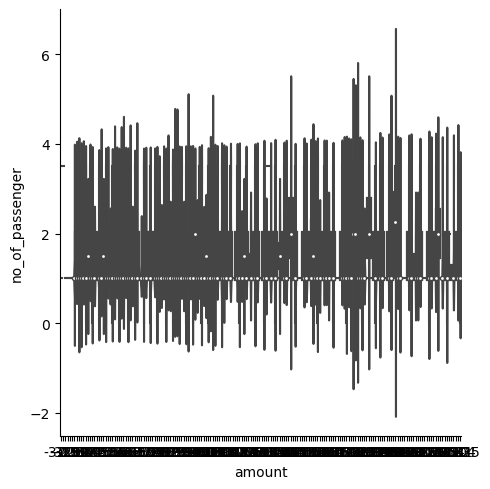

In [59]:
sns.catplot(x="amount",y="no_of_passenger",data=df,kind="violin")

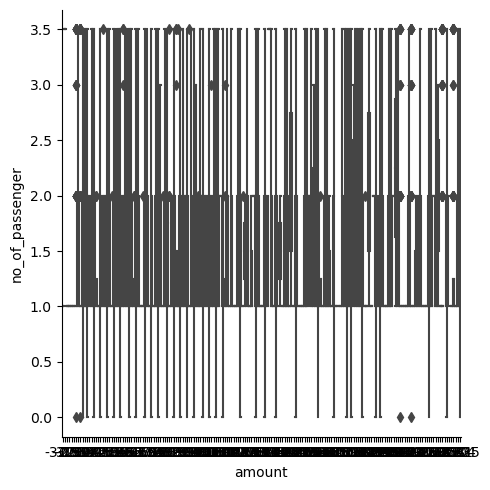

In [60]:
sns.catplot(x="amount",y="no_of_passenger",data=df,kind="box")

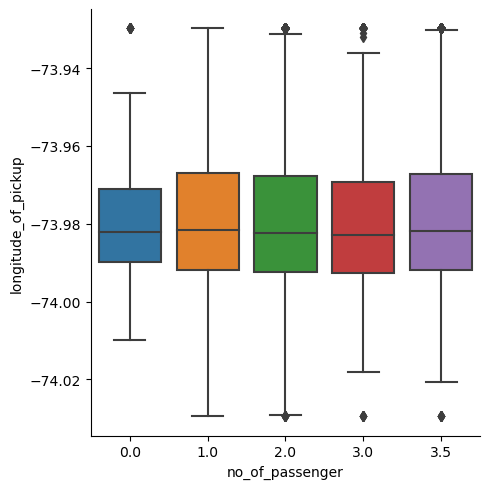

In [61]:
sns.catplot(x="no_of_passenger",y="longitude_of_pickup",data=df,kind="box")

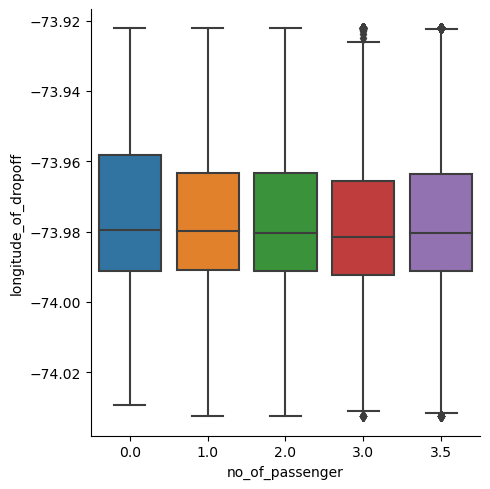

In [62]:
sns.catplot(x="no_of_passenger",y="longitude_of_dropoff",data=df,kind="box")

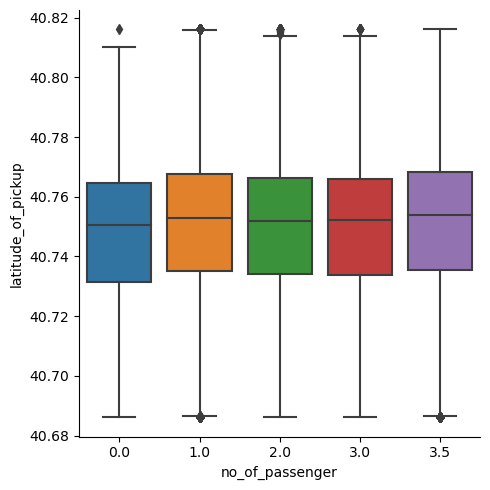

In [63]:
sns.catplot(x="no_of_passenger",y="latitude_of_pickup",data=df,kind="box")

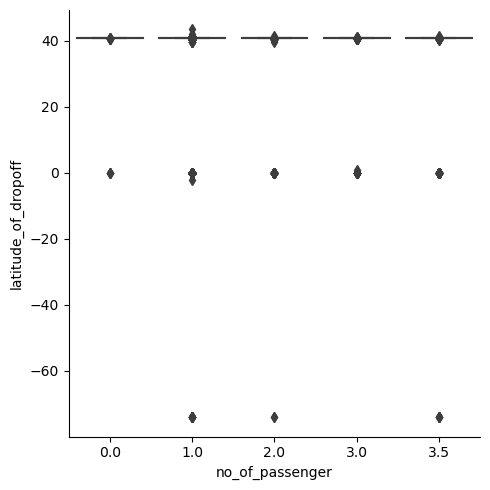

In [64]:
sns.catplot(x="no_of_passenger",y="latitude_of_dropoff",data=df,kind="box")

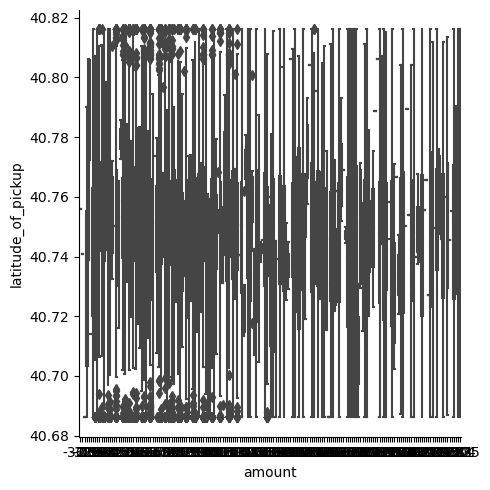

In [65]:
sns.catplot(x="amount",y="latitude_of_pickup",data=df,kind="box")

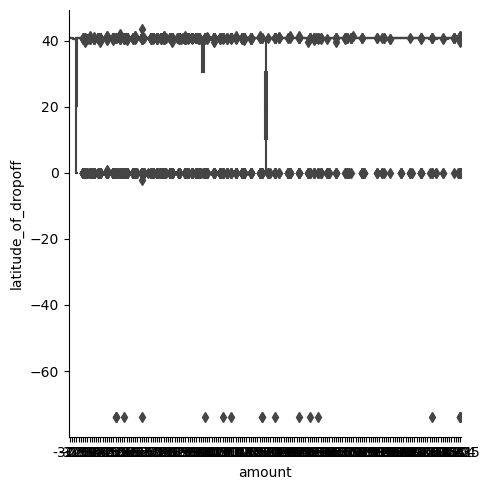

In [66]:
sns.catplot(x="amount",y="latitude_of_dropoff",data=df,kind="box")

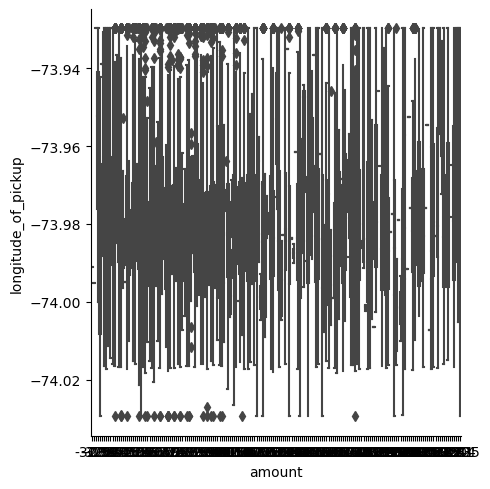

In [67]:
sns.catplot(x="amount",y="longitude_of_pickup",data=df,kind="box")

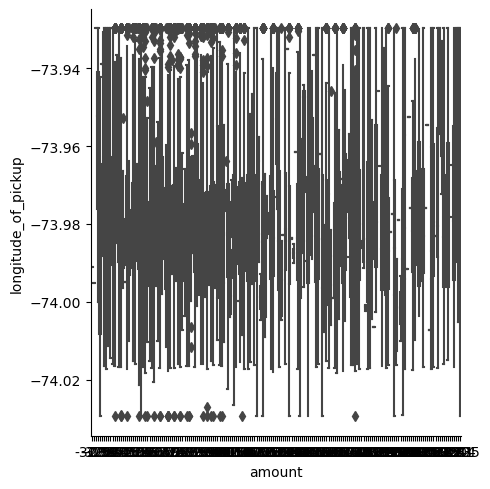

In [68]:
sns.catplot(x="amount",y="longitude_of_pickup",data=df,kind="box")

In [69]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [70]:
df.shape

(50000, 8)

# Encoding

In [71]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger         float64
dtype: object

In [72]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.929777,40.721319,-73.922231,40.712278,1.0
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [73]:
df=pd.get_dummies(df,columns=['no_of_passenger'])
df.sample()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger_0.0,no_of_passenger_1.0,no_of_passenger_2.0,no_of_passenger_3.0,no_of_passenger_3.5
46657,48:37.0,12.9,2010-11-01 07:48:37 UTC,-74.014519,40.716895,-73.981814,40.758886,False,True,False,False,False


In [74]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger_0.0,no_of_passenger_1.0,no_of_passenger_2.0,no_of_passenger_3.0,no_of_passenger_3.5
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.929777,40.721319,-73.922231,40.712278,False,True,False,False,False
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,False,True,False,False,False
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,False,False,True,False,False
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,False,True,False,False,False
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,False,True,False,False,False


In [75]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger_0.0        bool
no_of_passenger_1.0        bool
no_of_passenger_2.0        bool
no_of_passenger_3.0        bool
no_of_passenger_3.5        bool
dtype: object

In [76]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger_0.0     0
no_of_passenger_1.0     0
no_of_passenger_2.0     0
no_of_passenger_3.0     0
no_of_passenger_3.5     0
dtype: int64

# Seaborn

In [77]:
df=df.drop(['unique_id','date_time_of_pickup'],axis=1)

In [78]:
df.isnull().sum()

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger_0.0     0
no_of_passenger_1.0     0
no_of_passenger_2.0     0
no_of_passenger_3.0     0
no_of_passenger_3.5     0
dtype: int64

In [79]:
duplicate=df.duplicated()
print(duplicate.sum())

713


# Linear Regression

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [81]:
Y=df[["amount"]]
X=df.drop(["amount"],axis=1)

In [82]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [83]:
model_lr=LinearRegression(positive=False,fit_intercept=False)

In [84]:
model_lr.fit(X_train,Y_train)

LinearRegression(fit_intercept=False)

In [85]:
model_lr.score(X_train,Y_train)

0.1031020756100629

In [86]:
model_lr.score(X_test,Y_test)

0.10424165922641981

# Descision Tree Regressor

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [88]:
model_dtr=DecisionTreeRegressor(max_depth=2)

In [89]:
model_dtr.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=2)

In [90]:
model_dtr.score(X_train,Y_train)

0.2972893064477504

In [91]:
model_dtr.score(X_test,Y_test)

0.28864592476717976

# Bagging Model

In [92]:
from sklearn.ensemble import BaggingRegressor

In [93]:
model_bcr=BaggingRegressor(n_estimators=33,max_samples=0.9,base_estimator=model_dtr)

In [94]:
model_bcr.fit(X_train,Y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=2),
                 max_samples=0.9, n_estimators=33)

In [95]:
model_bcr.score(X_train,Y_train)

0.3068254713178056

In [96]:
model_bcr.score(X_test,Y_test)

0.29616948126635656

# Boosting Model

In [97]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [98]:
model_abc=AdaBoostRegressor()
model_gbc=GradientBoostingRegressor()
model_rfc=RandomForestRegressor(n_estimators=50,max_samples=10)

In [99]:
model_abc.fit(X_train,Y_train)

AdaBoostRegressor()

In [100]:
model_abc.score(X_train,Y_train)

0.2702752539498591

In [101]:
model_abc.score(X_test,Y_test)

0.25958144160400787

In [102]:
model_gbc.fit(X_train,Y_train)

GradientBoostingRegressor()

In [103]:
model_gbc.score(X_train,Y_train)

0.6697426599695314

In [104]:
model_gbc.score(X_test,Y_test)

0.654261104419805

In [105]:
model_rfc.fit(X_train,Y_train)

RandomForestRegressor(max_samples=10, n_estimators=50)

In [106]:
model_rfc.score(X_train,Y_train)

0.1354475836625445

In [107]:
model_rfc.score(X_test,Y_test)

0.1304032523723233

# SVR

In [123]:
from sklearn.svm import SVR
model_svr=SVR(epsilon=0.9,C=5,degree=50,kernel='sigmoid',tol=0.005)
model_svr.fit(X_train,Y_train)

SVR(C=5, degree=50, epsilon=0.9, kernel='sigmoid', tol=0.005)

In [124]:
model_svr.score(X_train,Y_train)

-0.09845698922082735

In [125]:
model_svr.score(X_test,Y_test)

-0.09106638058098371